In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

from ipywidgets import interactive, widgets, RadioButtons, ToggleButton, Select, FloatSlider, FloatRangeSlider, IntSlider, fixed

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# seaborn plotting style
sns.set(style='ticks', context='poster')

In [2]:
X = pd.read_csv("dengue_features_train.csv")
Y = pd.read_csv("dengue_labels_train.csv")
X_New = pd.read_csv("dengue_features_test.csv")
Y_New = pd.read_csv('submission_format.csv')

In [3]:
AX = X
AX['total_cases'] = Y['total_cases']
AX = AX[(AX['city']=='iq')]
AX = AX[['week_start_date','total_cases']]
AX['week_start_date'] = pd.to_datetime(AX['week_start_date'])
AX = AX[(AX['total_cases']<150)]
AX.set_index('week_start_date', inplace=True)

In [4]:
AX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2000-07-01 to 2010-06-25
Data columns (total 1 columns):
total_cases    520 non-null int64
dtypes: int64(1)
memory usage: 8.1 KB


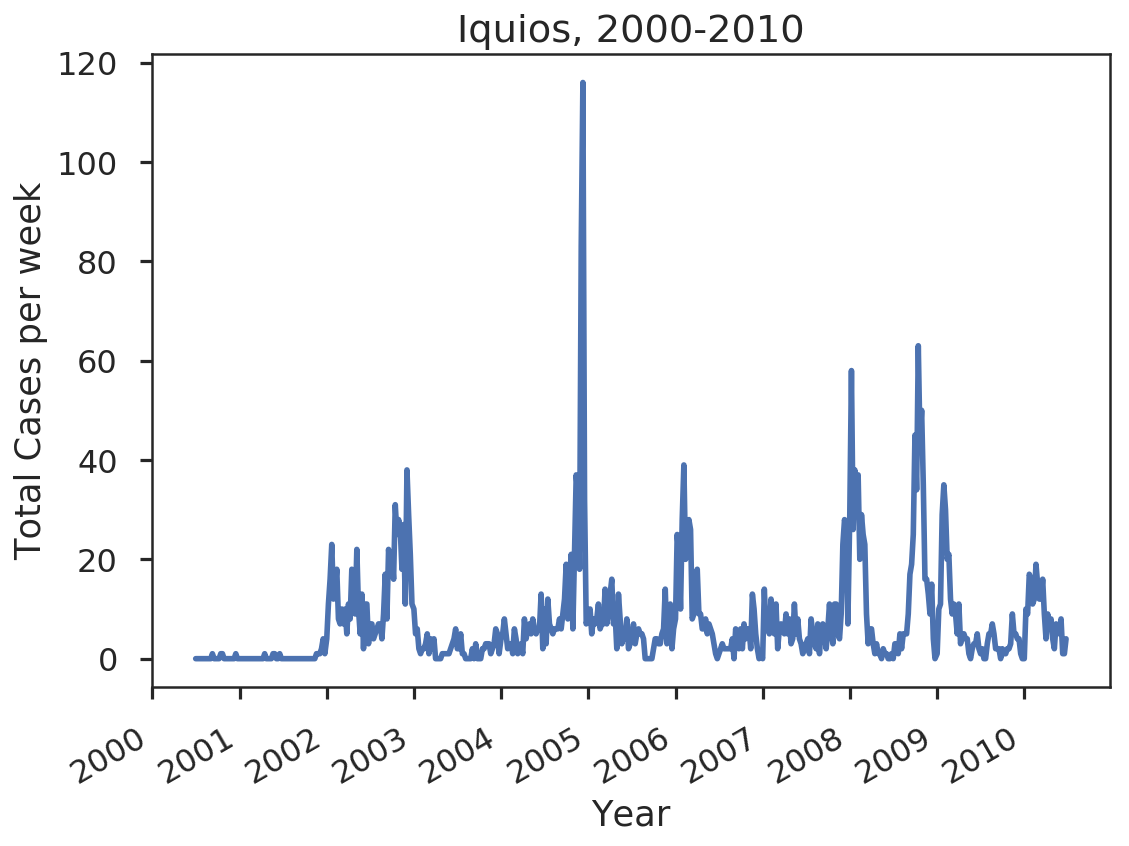

In [5]:
fig, ax = plt.subplots(figsize=(8,6));

AX['total_cases'].plot(ax=ax);

ax.set_title('Iquios, 2000-2010');
ax.set_ylabel('Total Cases per week');
ax.set_xlabel('Year');
ax.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [6]:
AX.drop(['1995-01-01':'1995-12-31'])

SyntaxError: invalid syntax (<ipython-input-6-7ad614255757>, line 1)

In [7]:
AX.index['1995-01-01':'1995-12-31']

TypeError: slice indices must be integers or None or have an __index__ method

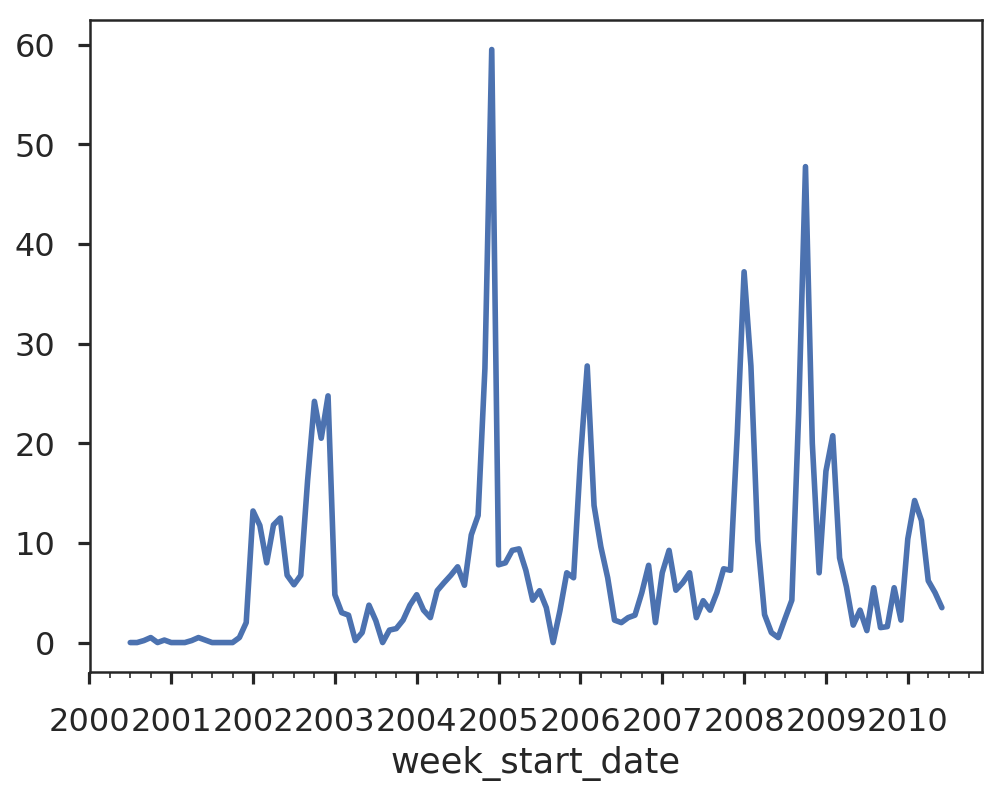

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
AX['total_cases'].resample('M').mean().plot(ax=ax)

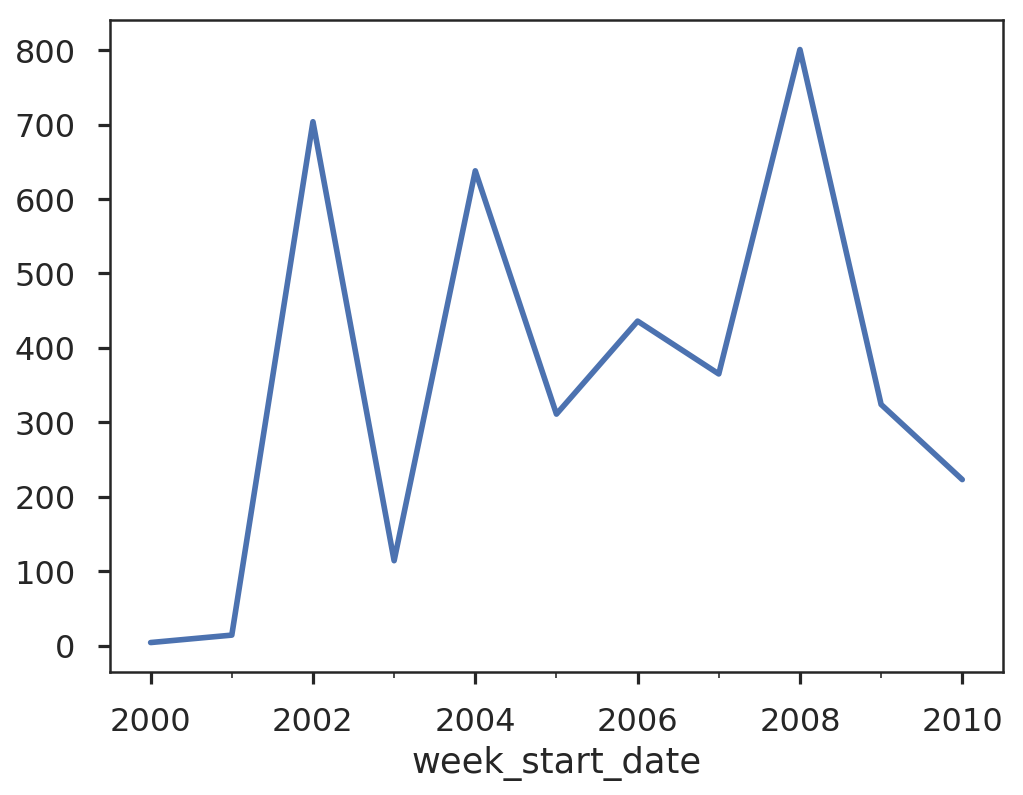

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
AX['total_cases'].resample('AS').sum().plot(ax=ax)